In [1]:
import pandas as pd
import numpy as np
import plot_functions
import common_functions
import apr_constants

MODEL_FILE_NAME = 'RF_20MFCC_10000_10GEN_GTZAN_Model'
TEST_FILE_NAME = '20MFCC_10000_10GEN_GTZAN_TestData'
MFCCS_FOLDER = '20'

SAVE_ROOT = apr_constants.ROOT_SAVE_PATH_TEST_MODEL

FILE_NAME = 'Test_Model_Predictions.csv'
FILE_NAME_COUNT = 'Test_Model_Predictions_Count.csv'

genres = {i: apr_constants.GENRE_TARGET_NAMES[i] for i in range(0, len(apr_constants.GENRE_TARGET_NAMES))}

In [2]:
model_path = 'test_data/' + apr_constants.MODEL
test_path = 'test_data/' + apr_constants.TEST

# Load the model from disk
load_model = common_functions.load_model(model_path, MODEL_FILE_NAME)

# Load the test data from disk
x_test, y_test = common_functions.load_test_data(test_path, TEST_FILE_NAME)

Model loading complete successfully!
Test Files loading complete successfully!


In [3]:
result = load_model.predict(x_test)

In [4]:
data = pd.DataFrame(columns=['real_genre_num', 'predict_genre_num', 'real_genre_text', 'predict_genre_text'])
data['real_genre_num'] = y_test.astype(int)
data['predict_genre_num'] = result.astype(int)
data['real_genre_text'] = data['real_genre_num'].replace(genres)
data['predict_genre_text'] = data['predict_genre_num'].replace(genres)
data.head()

,real_genre_num,predict_genre_num,real_genre_text,predict_genre_text
8018,8,8,reggae,reggae
9225,9,9,rock,rock
3854,3,3,disco,disco
2029,2,2,country,country
3539,3,3,disco,disco


In [5]:
comparison_column = np.where(data['real_genre_num'] == data['predict_genre_num'], True, False)
data['check'] = comparison_column
data.head()

,real_genre_num,predict_genre_num,real_genre_text,predict_genre_text,check
8018,8,8,reggae,reggae,True
9225,9,9,rock,rock,True
3854,3,3,disco,disco,True
2029,2,2,country,country,True
3539,3,3,disco,disco,True


In [6]:
visual_data = pd.DataFrame()
visual_data[['Genre', 'Real_Value']] = data[['real_genre_text', 'predict_genre_text']].groupby(['real_genre_text'], as_index=False).count()
visual_data[['Genre', 'Predict_Value']] = data[['real_genre_text', 'predict_genre_text']].groupby(['predict_genre_text'], as_index=False).count()
visual_data.head()

,Genre,Real_Value,Predict_Value
0,blues,326,304
1,classical,292,316
2,country,295,315
3,disco,293,297
4,hiphop,289,261


Save Models Predictions Compare


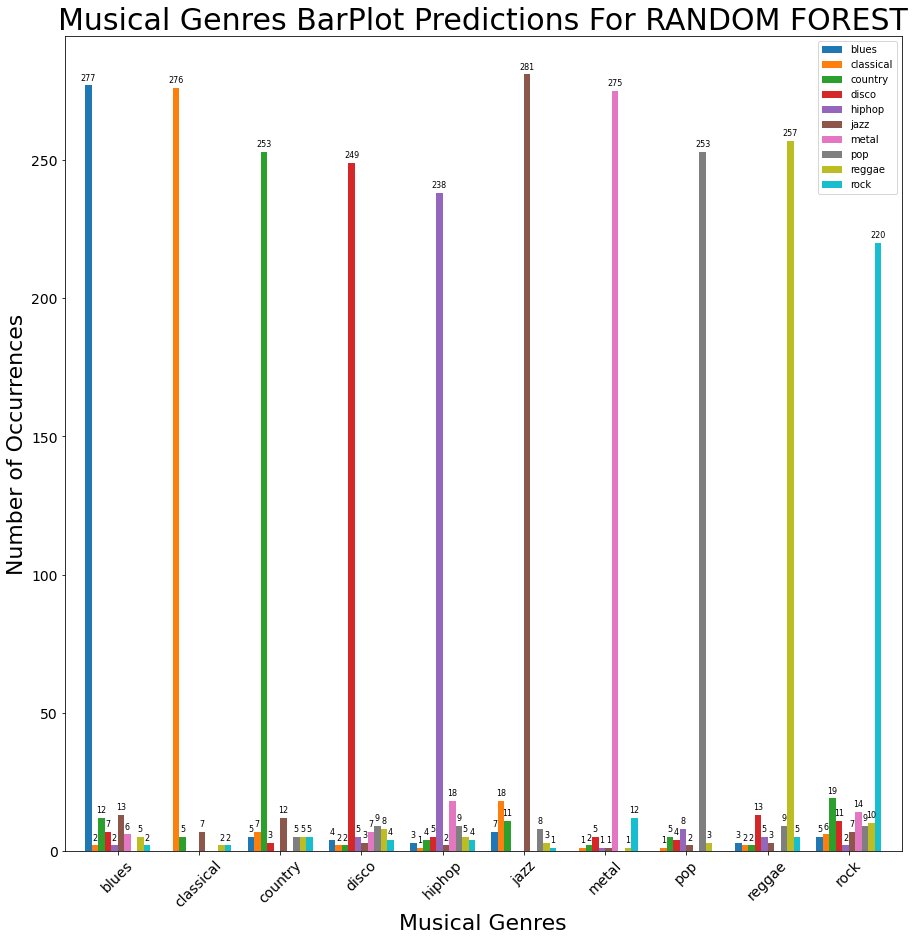

In [7]:
plot_functions.plot_predictions_compare(None, y_test, result, apr_constants.GENRE_TARGET_NAMES, 'Random_Forest', 'Complex Test Model Evaluation')

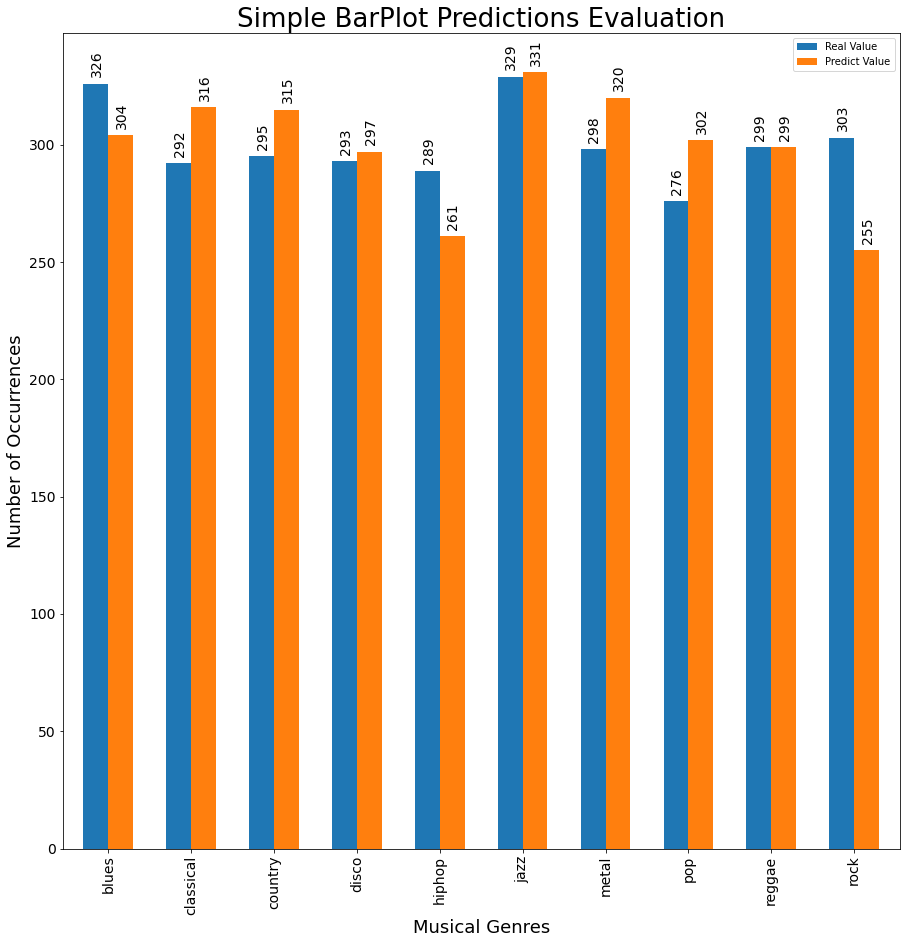

In [8]:
plot_functions.plot_predictions_simple_compare(visual_data, apr_constants.GENRE_TARGET_NAMES, False, 'Simple Test Model Evaluation')